In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

Import Datasets

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Binar/data.csv",encoding='latin-1')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [ ]:
alay_dict = pd.read_csv('/content/drive/MyDrive/Binar/new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})
alay_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15167 entries, 0 to 15166
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   original     15167 non-null  object
 1   replacement  15167 non-null  object
dtypes: object(2)
memory usage: 237.1+ KB


In [ ]:
abusive_dict = pd.read_csv('/content/drive/MyDrive/Binar/abusive.csv', encoding='latin-1')
abusive_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ABUSIVE  125 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


Check datasets

In [ ]:
dataset.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
abusive_dict.head()

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing


In [ ]:
alay_dict.head()

,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [ ]:
dataset.shape

(13169, 13)

In [ ]:
alay_dict.shape

(15167, 2)

Clean dataset

In [ ]:
#Create a dictionary from the new_kamisalay.csv
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

# Clean text function
def clean_function(text):
    text = text.lower() # Change all to lowercase
    text = re.sub('\n',' ',text) # Remove '\n'
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) # remove non alphanumerical
    text = re.sub('rt',' ',text) # Remove rt
    text = re.sub('user',' ',text) # Remove user
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove URL

    #Remove x.. sequence of unecessary word
    text = re.sub('xe5',' ',text)
    text = re.sub('xbc',' ',text)
    text = re.sub('xa0',' ',text)
    text = re.sub('xe8',' ',text)
    text = re.sub('x89',' ',text)
    text = re.sub('xba',' ',text)
    text = re.sub('xe2',' ',text)
    text = re.sub('x80',' ',text)
    text = re.sub('x99',' ',text)
    text = re.sub('xf0',' ',text)
    text = re.sub('x9f',' ',text)
    text = re.sub('x98',' ',text)
    text = re.sub('x82',' ',text)
    text = re.sub('x84',' ',text)
    text = re.sub('x8f',' ',text)
    text = re.sub('x86',' ',text)
    text = re.sub('xc2',' ',text)
    text = re.sub('xb2',' ',text)
    text = re.sub('xa2',' ',text)
    text = re.sub('xa4',' ',text)
    text = re.sub('x9d',' ',text)
    text = re.sub('x8b',' ',text)
    text = re.sub('x8e',' ',text)
    text = re.sub('xb6',' ',text)
    text = re.sub('xa7',' ',text)
    text = re.sub('xab',' ',text)
    text = re.sub('xaa',' ',text)

    text = re.sub('  +', ' ', text) # Remove extra spaces 
    text = normalize_alay(text) # Compare with the alay_dict
    
    return text

In [ ]:
dataset['Tweet'] = dataset['Tweet'].apply(clean_function)
dataset.head(15)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0
5,ya bani taplak dan kawan kawan,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilihan kepala daerah 2018 aman dan ...,0,0,0,0,0,0,0,0,0,0,0,0
7,gue baru saja selesai re watch aldnoah zero pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,nah admin belanja satu lagi po terbaik nak mak...,0,0,0,0,0,0,0,0,0,0,0,0
9,enak lagi kalau sambil ngewe,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset.duplicated().sum()

231

In [ ]:
df_new = dataset.drop_duplicates()
df_new.duplicated().sum()

0

In [ ]:
df_new.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
df_new.shape

(12938, 13)

In [ ]:
df_new = df_new.reset_index(drop=True)
df_new

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12933,jangan asal berbicara ndasmu congor kamu yang...,1,1,1,0,0,0,1,0,0,1,0,0
12934,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0
12935,hati hati bisu tidak dan lagi bosan duh,0,0,0,0,0,0,0,0,0,0,0,0
12936,bom yang real mudah terdeteksi bom yang terku...,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_new['total_word'] = df_new.Tweet.apply(lambda sent:len(sent.split()))
df_new

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_word
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,22
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0,19
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,39
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0,14
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12933,jangan asal berbicara ndasmu congor kamu yang...,1,1,1,0,0,0,1,0,0,1,0,0,10
12934,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,4
12935,hati hati bisu tidak dan lagi bosan duh,0,0,0,0,0,0,0,0,0,0,0,0,8
12936,bom yang real mudah terdeteksi bom yang terku...,0,0,0,0,0,0,0,0,0,0,0,0,18


In [ ]:
df_new.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_word
count,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000
mean,0.423559,0.383058,0.271062,0.152497,0.060751,0.043438,0.024656,0.022956,0.284588,0.256299,0.130855,0.036404,17.900912
std,0.494141,0.486151,0.444525,0.359515,0.238883,0.203849,0.155081,0.149768,0.451235,0.436606,0.337255,0.187301,11.412593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [ ]:
df_new.sum()

Tweet             di saat semua cowok berusaha melacak perhatia...
HS                                                            5480
Abusive                                                       4956
HS_Individual                                                 3507
HS_Group                                                      1973
HS_Religion                                                    786
HS_Race                                                        562
HS_Physical                                                    319
HS_Gender                                                      297
HS_Other                                                      3682
HS_Weak                                                       3316
HS_Moderate                                                   1693
HS_Strong                                                      471
dtype: object

In [ ]:
df_temp = df_new.append(df_new.sum(numeric_only=True), ignore_index=True)
df_temp['Tweet'].fillna('Total', inplace=True)
df_temp

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok berusaha melacak perhatia...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,siapa yang telat memberi tau kamu edan sarap ...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41 kadang aku berpikir kenapa aku tetap percay...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aku itu aku dan ku tau matamu sipit tapi dili...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,kaum cebong kafir sudah kelihatan dongoknya d...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12934,kasur mana enak kunyuk,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12935,hati hati bisu tidak dan lagi bosan duh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12936,bom yang real mudah terdeteksi bom yang terku...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12937,mana situ memberi itu cuma foto ya kutil onta,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
df_count = df_temp
df_count = df_count.drop(labels=12938, axis=0)
df_count

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12933,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12934,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_count.drop(df_count.columns[[2, 3, 4,5,6,7,8,9,10,11]], axis=1, inplace=True)
df_count

,HS,Abusive
0,1.0,1.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0
...,...,...
12933,1.0,1.0
12934,0.0,1.0
12935,0.0,0.0
12936,0.0,0.0


In [ ]:
conditions = [

    (df_count['HS'] == 0) & (df_count['Abusive'] == 0),
    (df_count['HS'] == 1) & (df_count['Abusive'] == 0),
    (df_count['HS'] == 0) & (df_count['Abusive'] == 1)
    ]

conditions2 = [
    (df_count['HS'] == 1) & (df_count['Abusive'] == 1),
    ]

conditions3 = [

    (df_count['HS'] == 1) & (df_count['Abusive'] == 1),
    (df_count['HS'] == 0 ) & (df_count['Abusive'] == 1),
    (df_count['HS'] == 0) & (df_count['Abusive'] == 0)
    ]

conditions4 = [

    (df_count['HS'] == 1) & (df_count['Abusive'] == 1),
    (df_count['HS'] == 1) & (df_count['Abusive'] == 0),
    (df_count['HS'] == 0) & (df_count['Abusive'] == 0)
    ]
# create a list of the values we want to assign for each condition
values = [1, 0, 0]
values2 = [1]
values3 = [0,1,0]

# create a new column and use np.select to assign values to it using our lists as arguments
df_count['Non'] = np.select(conditions, values)
df_count['Both'] = np.select(conditions2, values2)
df_count['Abuse'] = np.select(conditions3, values3)
df_count['Hate Speech'] = np.select(conditions4, values3)
df_count.head(50)


,HS,Abusive,Non,Both,Abuse,Hate Speech
0,1.0,1.0,0,1,0,0
1,0.0,1.0,0,0,1,0
2,0.0,0.0,1,0,0,0
3,0.0,0.0,1,0,0,0
4,1.0,1.0,0,1,0,0
5,1.0,1.0,0,1,0,0
6,0.0,0.0,1,0,0,0
7,0.0,1.0,0,0,1,0
8,0.0,0.0,1,0,0,0
9,0.0,1.0,0,0,1,0


In [ ]:
df_count.sum()

HS             5480.0
Abusive        4956.0
Non            5733.0
Both           3231.0
Abuse          1725.0
Hate Speech    2249.0
dtype: float64

In [ ]:
df_count.drop(df_count.columns[[0,1]], axis=1, inplace=True)
df_count

,Non,Both,Abuse,Hate Speech
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
12933,0,1,0,0
12934,0,0,1,0
12935,1,0,0,0
12936,1,0,0,0


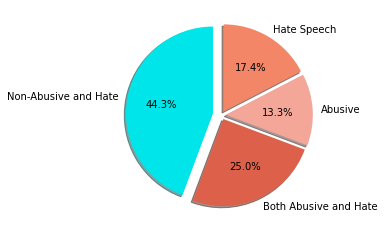

In [ ]:
data = [5733, 3231, 1725, 2249]
keys = ['Non-Abusive and Hate', 'Both Abusive and Hate', 'Abusive', 'Hate Speech']

color_palette_list = ['#00E5E9', '#DD614A', '#F4A698', '#F48668']

# plotting data on chart
plt.pie(data, labels=keys,startangle=90, colors=color_palette_list,shadow = True, autopct='%.1f%%',explode=(0.1,0.05,0.05,0.05))
  
# displaying chart
plt.show()

In [ ]:
conditions = [

    (df_count['Hate Speech'] == 1) | (df_count['Abuse'] == 1),
    (df_count['Both'] == 1)
    ]
values = [1, 1]

conditions2 = [

    (df_count['Non'] == 1)
    ]
values2 = [1]
df_count['Negatif'] = np.select(conditions, values)
df_count['Positif'] = np.select(conditions2, values2)
df_count.head(15)

,Non,Both,Abuse,Hate Speech,Negatif,Positif
0,0,1,0,0,1,0
1,0,0,1,0,1,0
2,1,0,0,0,0,1
3,1,0,0,0,0,1
4,0,1,0,0,1,0
5,0,1,0,0,1,0
6,1,0,0,0,0,1
7,0,0,1,0,1,0
8,1,0,0,0,0,1
9,0,0,1,0,1,0


In [ ]:
df_count.sum()

Non            5733
Both           3231
Abuse          1725
Hate Speech    2249
Negatif        7205
Positif        5733
dtype: int64

In [ ]:
df_count.describe()

,Non,Both,Abuse,Hate Speech,Negatif,Positif
count,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000
mean,0.443113,0.249729,0.133328,0.173829,0.556887,0.443113
std,0.496773,0.432873,0.339942,0.378977,0.496773,0.496773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


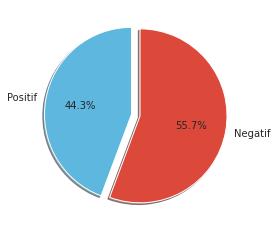

In [ ]:
data = [5733, 7205]
keys = ['Positif','Negatif']

color_palette_list = ['#5DB7DE', '#DC493A']

# plotting data on chart
plt.pie(data, labels=keys,startangle=90, colors=color_palette_list,shadow = True, autopct='%.1f%%',explode=(0.05,0.05))
  
# displaying chart
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


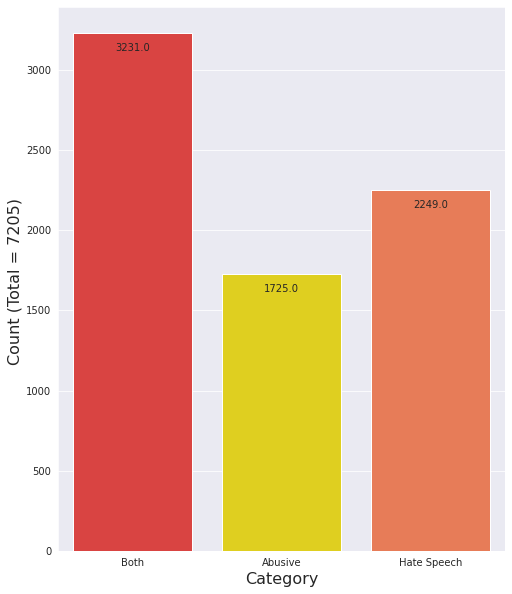

In [ ]:
sns.set_style('darkgrid')

x = ['Both', 'Abusive', 'Hate Speech']
y = [3231, 1725, 2249]

plt.figure(figsize = (8, 10))

color = ['#F22B29', '#FFEA00', '#FF7040']

splot = sns.barplot(x, y, palette = color)

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, -15),
                   textcoords = 'offset points')

plt.xlabel("Category", size = 16)
plt.ylabel("Count (Total = 7205) ", size = 16)


plt.show()

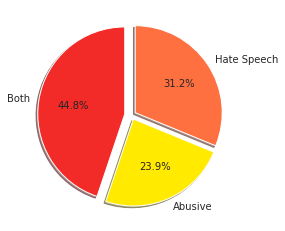

In [ ]:
data = [3231, 1725, 2249]
keys = ['Both', 'Abusive', 'Hate Speech']

color_palette_list = ['#F22B29', '#FFEA00', '#FF7040']

# plotting data on chart
plt.pie(data, labels=keys,startangle=90, colors=color_palette_list,shadow = True, autopct='%.1f%%',explode=(0.08,0.05,0.05))
  
# displaying chart
plt.show()